In [1]:
!pip install yfinance beautifulsoup4 requests pandas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 34.7 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 12.6 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-cp310-cp310-linux_x86_64.whl size=283792 sha256=d173961cc3bb0057754561869dc446a505b787508f9ee90445dc11ba71c39ae4
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/4b/b9/b0/83d6e258e8f963f5ff111a2cd8c483ca59372a86e6a2535212
Successfully built peewee


In [2]:
import yfinance as yf
import pandas as pd

# Extracción de datos de acciones de Tesla
tesla_ticker = "TSLA"
tesla_data = yf.download(tesla_ticker, start="2020-01-01", end="2023-01-01")
tesla_data.reset_index(inplace=True)

# Mostrar los primeros 5 registros
tesla_data.head()


[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


In [6]:
!pip install yahoo_fin

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.6 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=464beb0f81db9d6b637a8e07aaf8798ea6070fc7fed78b7a10fa516117ff5552
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k


In [9]:
!pip install yfinance


In [10]:
import yfinance as yf
import pandas as pd

# Extracción de datos de acciones de GameStop
gamestop_ticker = "GME"
gamestop_data = yf.download(gamestop_ticker, start="2020-01-01", end="2023-01-01")
gamestop_data.reset_index(inplace=True)

# Mostrar los primeros 5 registros
print(gamestop_data.head())


[*********************100%%**********************]  1 of 1 completed

        Date    Open    High     Low   Close  Adj Close    Volume
0 2020-01-02  1.5350  1.6175  1.5175  1.5775     1.5775  17814400
1 2020-01-03  1.5525  1.5625  1.4600  1.4700     1.4700  14175600
2 2020-01-06  1.4500  1.4775  1.4000  1.4625     1.4625  13579200
3 2020-01-07  1.4425  1.4575  1.3600  1.3800     1.3800  20912000
4 2020-01-08  1.3725  1.4625  1.3525  1.4300     1.4300  22517600


In [11]:
# URL de los datos financieros de GameStop (Yahoo Finance)
url = "https://finance.yahoo.com/quote/GME/financials?p=GME"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extracción de los ingresos de GameStop
tables = soup.find_all("div", {"class": "D(tbr)"})
gamestop_revenue = []

for table in tables:
    rows = table.find_all("div", {"class": "D(tbc)"})
    for row in rows:
        if "Revenue" in row.text:
            revenue_row = row.find_all_next("div", {"class": "Ta(c)"})
            for revenue in revenue_row:
                gamestop_revenue.append(revenue.text)

# Crear DataFrame de ingresos de GameStop
gamestop_revenue_df = pd.DataFrame(gamestop_revenue, columns=["Revenue"])

# Mostrar los datos de ingresos de GameStop
gamestop_revenue_df


,Revenue


In [12]:
!pip install alpha_vantage


In [14]:
from alpha_vantage.fundamentaldata import FundamentalData
import pandas as pd

# Tu clave API de Alpha Vantage
api_key = 'PVXQ8JS5W4D0ERX0'  

# Crear una instancia del cliente de Alpha Vantage
fd = FundamentalData(key=api_key, output_format='pandas')

# Obtener los datos financieros anuales de GameStop
gamestop_income_statement, _ = fd.get_income_statement_annual('GME')

# Filtrar la tabla para obtener sólo los ingresos totales
gamestop_revenue_df = gamestop_income_statement[['fiscalDateEnding', 'totalRevenue']]
gamestop_revenue_df.columns = ["Date", "Revenue"]

# Mostrar los datos de ingresos de GameStop
print(gamestop_revenue_df)


                                     Date     Revenue
date                                                 
1970-01-01 00:00:00.000000000  2024-02-03  5272800000
1970-01-01 00:00:00.000000001  2023-01-28  5927200000
1970-01-01 00:00:00.000000002  2022-01-29  6010700000
1970-01-01 00:00:00.000000003  2021-01-30  5089800000
1970-01-01 00:00:00.000000004  2020-02-01  6466000000
1970-01-01 00:00:00.000000005  2019-02-02  8285300000
1970-01-01 00:00:00.000000006  2018-02-03  8547100000
1970-01-01 00:00:00.000000007  2017-01-28  8543700000
1970-01-01 00:00:00.000000008  2016-01-30  9336800000
1970-01-01 00:00:00.000000009  2015-01-31  9280600000
1970-01-01 00:00:00.000000010  2014-02-01  9026800000
1970-01-01 00:00:00.000000011  2013-02-02  8869500000
1970-01-01 00:00:00.000000012  2012-01-28  9517900000
1970-01-01 00:00:00.000000013  2011-01-29  9430700000
1970-01-01 00:00:00.000000014  2010-01-30  9027320000


In [15]:
from alpha_vantage.fundamentaldata import FundamentalData
import pandas as pd

# Tu clave API de Alpha Vantage
api_key = 'PVXQ8JS5W4D0ERX0'

# Crear una instancia del cliente de Alpha Vantage
fd = FundamentalData(key=api_key, output_format='pandas')

# Obtener los datos financieros anuales de Tesla
tesla_income_statement, _ = fd.get_income_statement_annual('TSLA')

# Mostrar los datos de ingresos de Tesla
tesla_revenue_df = tesla_income_statement[['fiscalDateEnding', 'totalRevenue']]
tesla_revenue_df.columns = ["Date", "Revenue"]
print(tesla_revenue_df)


                                     Date      Revenue
date                                                  
1970-01-01 00:00:00.000000000  2023-12-31  96773000000
1970-01-01 00:00:00.000000001  2022-12-31  81462000000
1970-01-01 00:00:00.000000002  2021-12-31  53823000000
1970-01-01 00:00:00.000000003  2020-12-31  31536000000
1970-01-01 00:00:00.000000004  2019-12-31  24578000000
1970-01-01 00:00:00.000000005  2018-12-31  21461000000
1970-01-01 00:00:00.000000006  2017-12-31  11759000000
1970-01-01 00:00:00.000000007  2016-12-31   7000132000
1970-01-01 00:00:00.000000008  2015-12-31   4046025000
1970-01-01 00:00:00.000000009  2014-12-31   3198356000
1970-01-01 00:00:00.000000010  2013-12-31    217070000
1970-01-01 00:00:00.000000011  2012-12-31    413256000
1970-01-01 00:00:00.000000012  2011-12-31    204242000


In [17]:
import yfinance as yf
import pandas as pd

# Descargar datos de acciones de Tesla
tesla_ticker = "TSLA"
tesla_data = yf.download(tesla_ticker, start="2020-01-01", end="2023-01-01")
tesla_data.reset_index(inplace=True)

# Mostrar los primeros 5 registros
print(tesla_data.head())


[*********************100%%**********************]  1 of 1 completed

        Date       Open       High        Low      Close  Adj Close     Volume
0 2020-01-02  28.299999  28.713333  28.114000  28.684000  28.684000  142981500
1 2020-01-03  29.366667  30.266666  29.128000  29.534000  29.534000  266677500
2 2020-01-06  29.364668  30.104000  29.333332  30.102667  30.102667  151995000
3 2020-01-07  30.760000  31.441999  30.224001  31.270666  31.270666  268231500
4 2020-01-08  31.580000  33.232666  31.215334  32.809334  32.809334  467164500


In [18]:
from alpha_vantage.fundamentaldata import FundamentalData

# Tu clave API de Alpha Vantage
api_key = 'PVXQ8JS5W4D0ERX0'  # Reemplaza 'TU_API_KEY' con tu clave API real

# Crear una instancia del cliente de Alpha Vantage
fd = FundamentalData(key=api_key, output_format='pandas')

# Obtener los datos financieros anuales de Tesla
tesla_income_statement, _ = fd.get_income_statement_annual('TSLA')

# Filtrar la tabla para obtener sólo los ingresos totales
tesla_revenue_df = tesla_income_statement[['fiscalDateEnding', 'totalRevenue']]
tesla_revenue_df.columns = ["Date", "Revenue"]

# Mostrar los datos de ingresos de Tesla
print(tesla_revenue_df)


                                     Date      Revenue
date                                                  
1970-01-01 00:00:00.000000000  2023-12-31  96773000000
1970-01-01 00:00:00.000000001  2022-12-31  81462000000
1970-01-01 00:00:00.000000002  2021-12-31  53823000000
1970-01-01 00:00:00.000000003  2020-12-31  31536000000
1970-01-01 00:00:00.000000004  2019-12-31  24578000000
1970-01-01 00:00:00.000000005  2018-12-31  21461000000
1970-01-01 00:00:00.000000006  2017-12-31  11759000000
1970-01-01 00:00:00.000000007  2016-12-31   7000132000
1970-01-01 00:00:00.000000008  2015-12-31   4046025000
1970-01-01 00:00:00.000000009  2014-12-31   3198356000
1970-01-01 00:00:00.000000010  2013-12-31    217070000
1970-01-01 00:00:00.000000011  2012-12-31    413256000
1970-01-01 00:00:00.000000012  2011-12-31    204242000


/tmp/wsuser/ipykernel_276/4142615174.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_revenue_df["Date"] = pd.to_datetime(tesla_revenue_df["Date"])
/tmp/wsuser/ipykernel_276/4142615174.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_revenue_df["Revenue"] = tesla_revenue_df["Revenue"].replace({',': ''}, regex=True).astype(float)


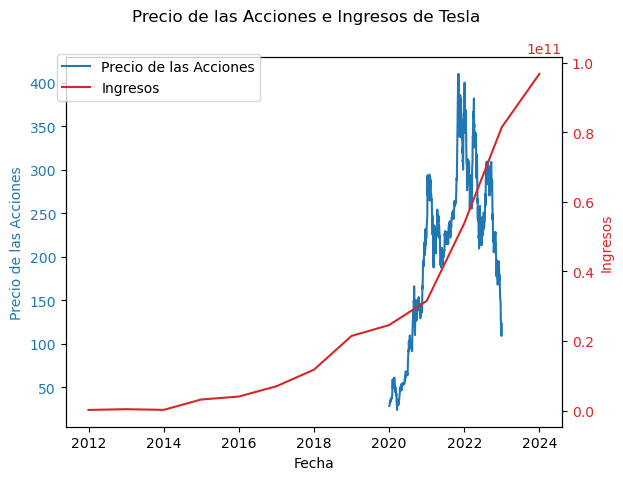

In [19]:
import matplotlib.pyplot as plt

# Convertir fechas y datos de ingresos a números
tesla_revenue_df["Date"] = pd.to_datetime(tesla_revenue_df["Date"])
tesla_revenue_df["Revenue"] = tesla_revenue_df["Revenue"].replace({',': ''}, regex=True).astype(float)

# Crear la figura y los ejes
fig, ax1 = plt.subplots()

# Gráfico de los precios de las acciones
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio de las Acciones', color='tab:blue')
ax1.plot(tesla_data['Date'], tesla_data['Close'], color='tab:blue', label='Precio de las Acciones')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Crear un segundo eje y
ax2 = ax1.twinx()
ax2.set_ylabel('Ingresos', color='tab:red')
ax2.plot(tesla_revenue_df['Date'], tesla_revenue_df['Revenue'], color='tab:red', label='Ingresos')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Agregar título y leyenda
fig.suptitle('Precio de las Acciones e Ingresos de Tesla')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

# Mostrar gráfico
plt.show()


In [22]:
import yfinance as yf
import pandas as pd

# Descargar datos de acciones de GameStop
gamestop_ticker = "GME"
gamestop_data = yf.download(gamestop_ticker, start="2020-01-01", end="2023-01-01")
gamestop_data.reset_index(inplace=True)

# Mostrar los primeros 5 registros
print(gamestop_data.head())


[*********************100%%**********************]  1 of 1 completed

        Date    Open    High     Low   Close  Adj Close    Volume
0 2020-01-02  1.5350  1.6175  1.5175  1.5775     1.5775  17814400
1 2020-01-03  1.5525  1.5625  1.4600  1.4700     1.4700  14175600
2 2020-01-06  1.4500  1.4775  1.4000  1.4625     1.4625  13579200
3 2020-01-07  1.4425  1.4575  1.3600  1.3800     1.3800  20912000
4 2020-01-08  1.3725  1.4625  1.3525  1.4300     1.4300  22517600


In [23]:
from alpha_vantage.fundamentaldata import FundamentalData

# Tu clave API de Alpha Vantage
api_key = 'PVXQ8JS5W4D0ERX0'  # Reemplaza 'TU_API_KEY' con tu clave API real

# Crear una instancia del cliente de Alpha Vantage
fd = FundamentalData(key=api_key, output_format='pandas')

# Obtener los datos financieros anuales de GameStop
gamestop_income_statement, _ = fd.get_income_statement_annual('GME')

# Filtrar la tabla para obtener sólo los ingresos totales
gamestop_revenue_df = gamestop_income_statement[['fiscalDateEnding', 'totalRevenue']]
gamestop_revenue_df.columns = ["Date", "Revenue"]

# Mostrar los datos de ingresos de GameStop
print(gamestop_revenue_df)


                                     Date     Revenue
date                                                 
1970-01-01 00:00:00.000000000  2024-02-03  5272800000
1970-01-01 00:00:00.000000001  2023-01-28  5927200000
1970-01-01 00:00:00.000000002  2022-01-29  6010700000
1970-01-01 00:00:00.000000003  2021-01-30  5089800000
1970-01-01 00:00:00.000000004  2020-02-01  6466000000
1970-01-01 00:00:00.000000005  2019-02-02  8285300000
1970-01-01 00:00:00.000000006  2018-02-03  8547100000
1970-01-01 00:00:00.000000007  2017-01-28  8543700000
1970-01-01 00:00:00.000000008  2016-01-30  9336800000
1970-01-01 00:00:00.000000009  2015-01-31  9280600000
1970-01-01 00:00:00.000000010  2014-02-01  9026800000
1970-01-01 00:00:00.000000011  2013-02-02  8869500000
1970-01-01 00:00:00.000000012  2012-01-28  9517900000
1970-01-01 00:00:00.000000013  2011-01-29  9430700000
1970-01-01 00:00:00.000000014  2010-01-30  9027320000


/tmp/wsuser/ipykernel_276/2209489412.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gamestop_revenue_df["Date"] = pd.to_datetime(gamestop_revenue_df["Date"])
/tmp/wsuser/ipykernel_276/2209489412.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gamestop_revenue_df["Revenue"] = gamestop_revenue_df["Revenue"].replace({',': ''}, regex=True).astype(float)


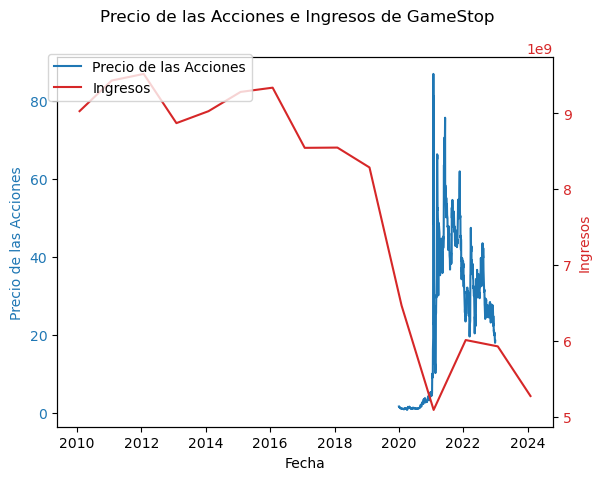

In [24]:
import matplotlib.pyplot as plt

# Convertir fechas y datos de ingresos a números
gamestop_revenue_df["Date"] = pd.to_datetime(gamestop_revenue_df["Date"])
gamestop_revenue_df["Revenue"] = gamestop_revenue_df["Revenue"].replace({',': ''}, regex=True).astype(float)

# Crear la figura y los ejes
fig, ax1 = plt.subplots()

# Gráfico de los precios de las acciones
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio de las Acciones', color='tab:blue')
ax1.plot(gamestop_data['Date'], gamestop_data['Close'], color='tab:blue', label='Precio de las Acciones')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Crear un segundo eje y
ax2 = ax1.twinx()
ax2.set_ylabel('Ingresos', color='tab:red')
ax2.plot(gamestop_revenue_df['Date'], gamestop_revenue_df['Revenue'], color='tab:red', label='Ingresos')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Agregar título y leyenda
fig.suptitle('Precio de las Acciones e Ingresos de GameStop')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

# Mostrar gráfico
plt.show()
